In [25]:
# import library

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

df=pd.read_csv(r"E:\data analytics\movies.csv")

In [26]:
# let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [27]:
# let's see if there is any missing data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print("{} - {}%".format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [28]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [71]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [83]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5144,5,0,2015,3080,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,-1
7244,536,5,0,2018,1025,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,-1
7480,6194,4,2,2019,545,6.9,222000.0,1455,1919,676,55,260000000,1670727580,-1,118.0,488
6653,2969,5,0,2015,786,7.0,593000.0,517,3568,437,55,150000000,1670516444,-1,124.0,704
6043,5502,5,0,2012,1639,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,1472


In [85]:
df['released'] = df['released'].astype(str)


In [86]:
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5144,5,0,2015,3080,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,3080
7244,536,5,0,2018,1025,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,1025
7480,6194,4,2,2019,545,6.9,222000.0,1455,1919,676,55,260000000,1670727580,-1,118.0,NaN
6653,2969,5,0,2015,786,7.0,593000.0,517,3568,437,55,150000000,1670516444,-1,124.0,NaN
6043,5502,5,0,2012,1639,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,1639


In [46]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [34]:
pd.set_option('display.max_rows',None)

In [35]:
# Drop any duplicates
df['company']=df['company'].drop_duplicates().sort_values(ascending=False)

In [89]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5144,5,0,2015,2314,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,2080
7244,536,5,0,2018,31,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,25
7480,6194,4,2,2019,2911,6.9,222000.0,1455,1919,676,55,260000000,1670727580,-1,118.0,-1
6653,2969,5,0,2015,3178,7.0,593000.0,517,3568,437,55,150000000,1670516444,-1,124.0,-1
6043,5502,5,0,2012,712,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,639


In [44]:
# Budget high correlation
# Company high correlation

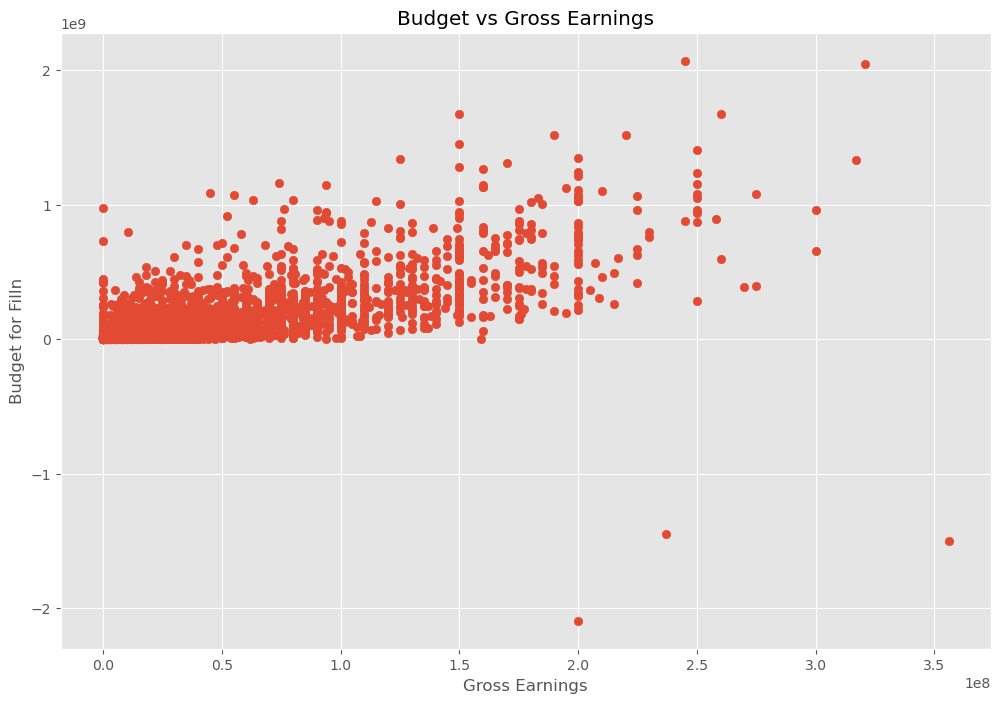

In [49]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross Earnings")

plt.xlabel("Gross Earnings")
plt.ylabel("Budget for Filln")
plt.show()

In [47]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,NaN,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,NaN,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

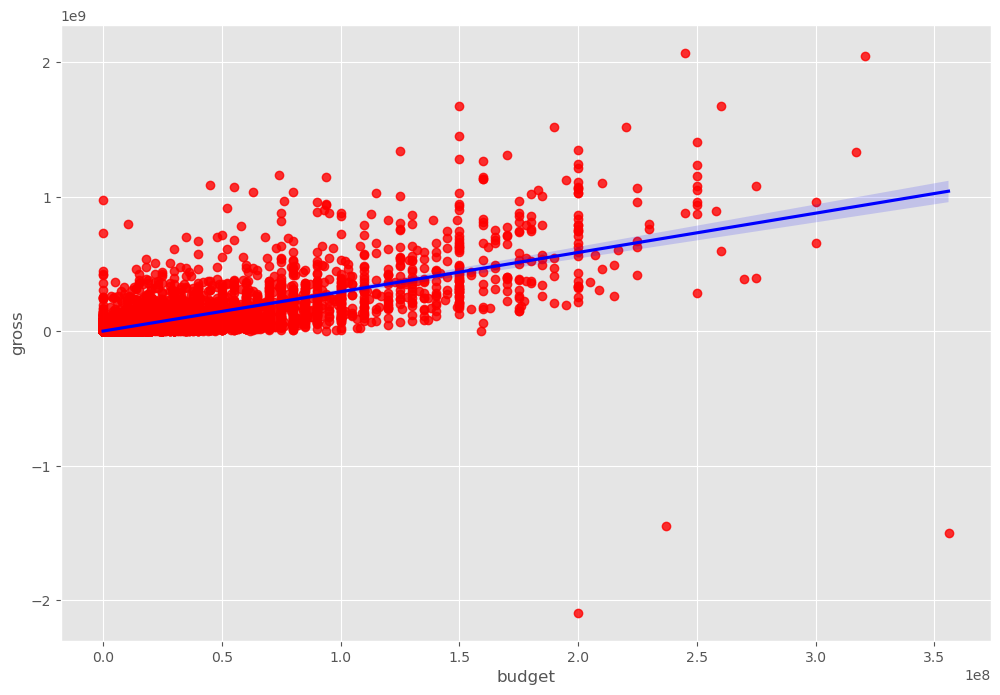

In [51]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [52]:
# let's start looking at correlation

In [56]:
df.corr(method='pearson') #Pearson , Kendal , spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261092,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.173680,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.588068,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.704237,0.269510
gross,0.261092,0.173680,0.588068,0.704237,1.000000,0.210915
runtime,0.120811,0.399451,0.309212,0.269510,0.210915,1.000000


In [57]:
# High correlation between budget and gross


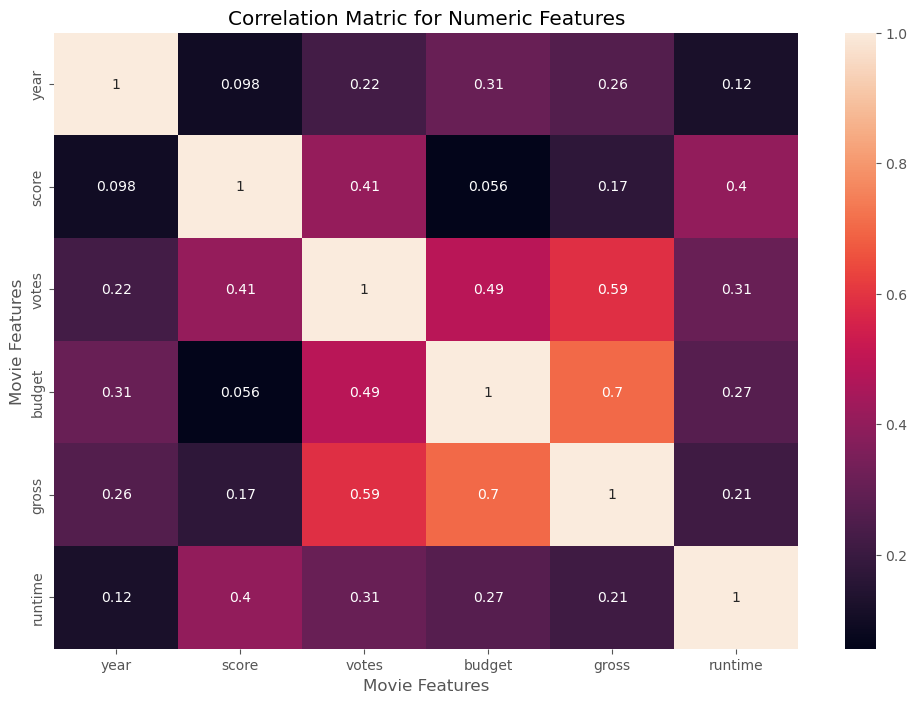

In [60]:
correlation_matrix=df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matric for Numeric Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [61]:
# Looks at company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,NaN,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,NaN,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


In [87]:
df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5144,5,0,2015,2314,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,2080
7244,536,5,0,2018,31,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,25
7480,6194,4,2,2019,2911,6.9,222000.0,1455,1919,676,55,260000000,1670727580,-1,118.0,-1
6653,2969,5,0,2015,3178,7.0,593000.0,517,3568,437,55,150000000,1670516444,-1,124.0,-1
6043,5502,5,0,2012,712,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,639


In [88]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,5144,5,0,2015,2314,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,2080
7244,536,5,0,2018,31,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,25
7480,6194,4,2,2019,2911,6.9,222000.0,1455,1919,676,55,260000000,1670727580,-1,118.0,-1
6653,2969,5,0,2015,3178,7.0,593000.0,517,3568,437,55,150000000,1670516444,-1,124.0,-1
6043,5502,5,0,2012,712,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,639


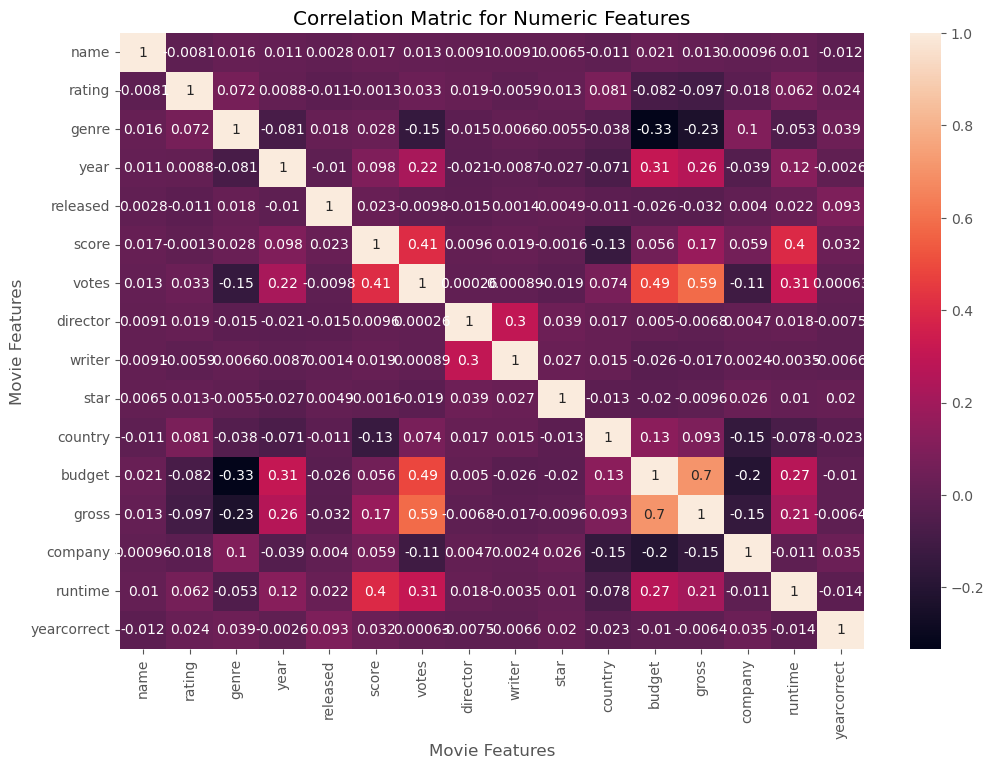

In [76]:
correlation_matrix=df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matric for Numeric Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [77]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,0.002843,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.012509,0.000961,0.010392,-0.011944
rating,-0.008069,1.000000,0.072423,0.008779,-0.011441,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.096761,-0.018387,0.062145,0.023942
genre,0.016355,0.072423,1.000000,-0.081261,0.018393,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234036,0.099779,-0.052711,0.039286
year,0.011453,0.008779,-0.081261,1.000000,-0.010495,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261092,-0.038516,0.120811,-0.002611
released,0.002843,-0.011441,0.018393,-0.010495,1.000000,0.023247,-0.009806,-0.014800,0.001402,0.004909,-0.011358,-0.025596,-0.031744,0.004039,0.021713,0.092728
score,0.017097,-0.001314,0.027965,0.097995,0.023247,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.173680,0.059243,0.399451,0.031985
votes,0.013088,0.033225,-0.145307,0.222945,-0.009806,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.588068,-0.109982,0.309212,0.000634
director,0.009079,0.019483,-0.015258,-0.020795,-0.014800,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.006790,0.004740,0.017624,-0.007528
writer,0.009081,-0.005921,0.006567,-0.008656,0.001402,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.016682,0.002383,-0.003511,-0.006606
star,0.006472,0.013405,-0.005477,-0.027242,0.004909,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.009566,0.025543,0.010174,0.019968


In [79]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released       0.002843
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.012509
             company        0.000961
             runtime        0.010392
             yearcorrect   -0.011944
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released      -0.011441
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [80]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234036
genre        gross         -0.234036
budget       company       -0.201700
company      budget        -0.201700
country      company       -0.150228
company      country       -0.150228
gross        company       -0.147640
company      gross         -0.147640
genre        votes         -0.145307
votes        genre         -0.145307
country      score         -0.133348
score        country       -0.133348
company      votes         -0.109982
votes        company       -0.109982
gross        rating        -0.096761
rating       gross         -0.096761
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052711
r

In [81]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.588068
gross        votes          0.588068
             budget         0.704237
budget       gross          0.704237
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [82]:
# Votes and Budget have the highest correlation to gross earnings

# Company has low correlation